In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype("float32") / 255.0
test_images  = test_images.astype("float32") / 255.0
train_images = train_images.reshape(-1, 28 * 28)
test_images  = test_images.reshape(-1, 28 * 28)


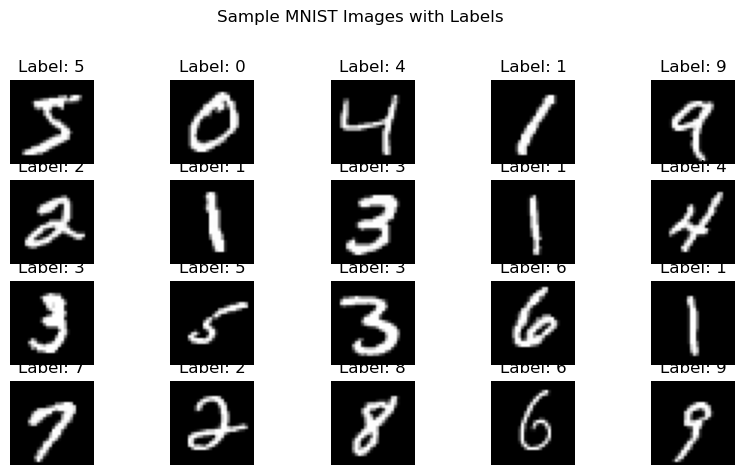

In [8]:
# Visualize sample images
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels', y=1.02)
plt.show()

In [5]:
def compile_and_build_model(model):
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


In [6]:
l1_model = compile_and_build_model(models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l1(1e-4)),
    layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l1(1e-4)),
    layers.Dense(10,  activation="softmax"),
]))

l2_model = compile_and_build_model(models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dense(10,  activation="softmax"),
]))


l3_model = compile_and_build_model(models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(512, activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4)),
    layers.Dense(256, activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4)),
    layers.Dense(10,  activation="softmax"),
]))


In [7]:
models_and_names = [("L1", l1_model), ("L2", l2_model), ("L3", l3_model)]
for name, mdl in models_and_names:
    print(f"\nTraining {name} model")
    mdl.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2)
    loss, acc = mdl.evaluate(test_images, test_labels, verbose=0)
    print(f"{name} test accuracy: {acc:.4f}")


Training L1 model
Epoch 1/10
469/469 - 12s - 26ms/step - accuracy: 0.9252 - loss: 1.0824
Epoch 2/10
469/469 - 10s - 22ms/step - accuracy: 0.9608 - loss: 0.4994
Epoch 3/10
469/469 - 10s - 22ms/step - accuracy: 0.9691 - loss: 0.3320
Epoch 4/10
469/469 - 10s - 22ms/step - accuracy: 0.9728 - loss: 0.2571
Epoch 5/10
469/469 - 10s - 22ms/step - accuracy: 0.9762 - loss: 0.2206
Epoch 6/10
469/469 - 10s - 22ms/step - accuracy: 0.9776 - loss: 0.1998
Epoch 7/10
469/469 - 10s - 22ms/step - accuracy: 0.9797 - loss: 0.1870
Epoch 8/10
469/469 - 10s - 22ms/step - accuracy: 0.9801 - loss: 0.1777
Epoch 9/10
469/469 - 10s - 22ms/step - accuracy: 0.9815 - loss: 0.1696
Epoch 10/10
469/469 - 10s - 21ms/step - accuracy: 0.9826 - loss: 0.1651
L1 test accuracy: 0.9810

Training L2 model
Epoch 1/10
469/469 - 13s - 27ms/step - accuracy: 0.9329 - loss: 0.3043
Epoch 2/10
469/469 - 10s - 22ms/step - accuracy: 0.9725 - loss: 0.1593
Epoch 3/10
469/469 - 20s - 43ms/step - accuracy: 0.9816 - loss: 0.1260
Epoch 4/10
46

In [9]:
test_loss, test_acc = l1_model.evaluate(test_images, test_labels)
print(f"\nL1 Test Accuracy: {test_acc:.4f}")

test_loss, test_acc = l2_model.evaluate(test_images, test_labels)
print(f"\nL2 Test Accuracy: {test_acc:.4f}")

test_loss, test_acc = l3_model.evaluate(test_images, test_labels)
print(f"\nL3 Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9769 - loss: 0.1855

L1 Test Accuracy: 0.9810
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9771 - loss: 0.1207

L2 Test Accuracy: 0.9806
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9737 - loss: 0.1921

L3 Test Accuracy: 0.9776


In [10]:
# Train L1 model and collect history
history = l1_model.fit(
    train_images, train_labels,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    verbose=2
)

# Train L2 model and collect history
history2 = l2_model.fit(
    train_images, train_labels,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    verbose=2
)

# Train L1/L2 model and collect history
history3 = l3_model.fit(
    train_images, train_labels,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    verbose=2
)


Epoch 1/10
375/375 - 9s - 24ms/step - accuracy: 0.9831 - loss: 0.1601 - val_accuracy: 0.9833 - val_loss: 0.1620
Epoch 2/10
375/375 - 10s - 27ms/step - accuracy: 0.9839 - loss: 0.1578 - val_accuracy: 0.9814 - val_loss: 0.1636
Epoch 3/10
375/375 - 10s - 27ms/step - accuracy: 0.9849 - loss: 0.1541 - val_accuracy: 0.9769 - val_loss: 0.1756
Epoch 4/10
375/375 - 10s - 28ms/step - accuracy: 0.9853 - loss: 0.1509 - val_accuracy: 0.9816 - val_loss: 0.1620
Epoch 5/10
375/375 - 9s - 25ms/step - accuracy: 0.9861 - loss: 0.1467 - val_accuracy: 0.9796 - val_loss: 0.1651
Epoch 6/10
375/375 - 10s - 28ms/step - accuracy: 0.9862 - loss: 0.1470 - val_accuracy: 0.9783 - val_loss: 0.1683
Epoch 7/10
375/375 - 19s - 52ms/step - accuracy: 0.9864 - loss: 0.1445 - val_accuracy: 0.9766 - val_loss: 0.1688
Epoch 8/10
375/375 - 11s - 29ms/step - accuracy: 0.9866 - loss: 0.1435 - val_accuracy: 0.9755 - val_loss: 0.1791
Epoch 9/10
375/375 - 10s - 26ms/step - accuracy: 0.9865 - loss: 0.1438 - val_accuracy: 0.9760 - va

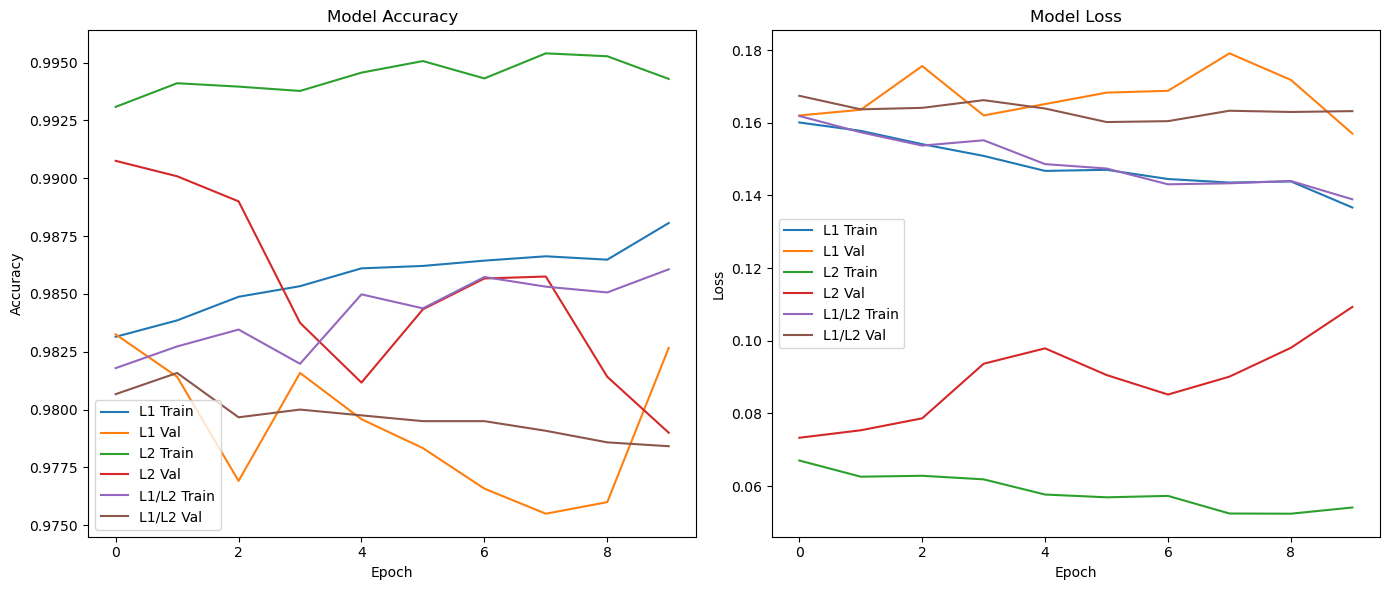

In [11]:
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='L1 Train')
plt.plot(history.history['val_accuracy'], label='L1 Val')
plt.plot(history2.history['accuracy'], label='L2 Train')
plt.plot(history2.history['val_accuracy'], label='L2 Val')
plt.plot(history3.history['accuracy'], label='L1/L2 Train')
plt.plot(history3.history['val_accuracy'], label='L1/L2 Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='L1 Train')
plt.plot(history.history['val_loss'], label='L1 Val')
plt.plot(history2.history['loss'], label='L2 Train')
plt.plot(history2.history['val_loss'], label='L2 Val')
plt.plot(history3.history['loss'], label='L1/L2 Train')
plt.plot(history3.history['val_loss'], label='L1/L2 Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
l1_test_loss, l1_test_acc = l1_model.evaluate(test_images, test_labels, verbose=0)
l2_test_loss, l2_test_acc = l2_model.evaluate(test_images, test_labels, verbose=0)
l3_test_loss, l3_test_acc = l3_model.evaluate(test_images, test_labels, verbose=0)

l1_train_loss = history.history['loss'][-1]
l1_val_loss   = history.history['val_loss'][-1]

l2_train_loss = history2.history['loss'][-1]
l2_val_loss   = history2.history['val_loss'][-1]

l3_train_loss = history3.history['loss'][-1]
l3_val_loss   = history3.history['val_loss'][-1]


In [14]:
import pandas as pd

data = {
    "Metric": ["Train Loss", "Val Loss", "Test Accuracy"],
    "L1": [l1_train_loss, l1_val_loss, l1_test_acc],
    "L2": [l2_train_loss, l2_val_loss, l2_test_acc],
    "L1+L2": [l3_train_loss, l3_val_loss, l3_test_acc]
}

df = pd.DataFrame(data)
df.set_index("Metric", inplace=True)
print(df.round(4))


                   L1      L2   L1+L2
Metric                               
Train Loss     0.1367  0.0541  0.1389
Val Loss       0.1570  0.1093  0.1632
Test Accuracy  0.9794  0.9745  0.9743


### L1 Regularization:
The L1-regularized model shows good generalization with reasonably low training and validation loss. However, its performance is slightly less stable than L2, possibly due to its tendency to push weights to exact zero, which can result in underfitting for more complex patterns. It performs well but not as consistently as L2.

### L2 Regularization:
The L2-regularized model achieves the lowest training and validation loss, along with the highest test accuracy. This suggests that it generalizes better to unseen data and avoids overfitting more effectively. L2 tends to distribute weights smoothly rather than eliminating them, which helps preserve important features.

### L1 + L2 (Elastic Net) Regularization:
The model with combined L1 and L2 regularization performs close to L2 but with slightly higher loss values. It benefits from both sparsity (L1) and smoothness (L2), making it a good middle ground. While not the top performer, it provides a balanced regularization approach, especially useful when some features are expected to be irrelevant.

